# Sklearn

# Визуализация данных

In [1]:
from sklearn import datasets

import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Загрузка выборки

In [3]:
digits  =  datasets.load_digits()

In [4]:
print digits.DESCR

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [5]:
# выведим данные нулевого объекта
print 'target:', digits.target[0]
print 'features: \n', digits.data[0] 
print 'number of features:', len(digits.data[0])

target: 0
features: 
[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]
number of features: 64


## Визуализация объектов выборки

In [ ]:
# не будет работать: будет ошибка Invalid dimensions for image data
pylab.imshow(digits.data[0])

In [6]:
# т.к. размер 64 на 0, а нужна матрица 8 на 8
digits.data[0].shape

(64,)

In [7]:
# преобразование вектора признаков нуллевого объекта в матрицу 8 на 8
print digits.data[0].reshape(8,8)

[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


In [8]:
digits.data[0].reshape(8,8).shape

(8, 8)

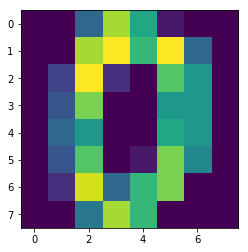

In [9]:
# визуализация нулевого объекта выборки (это цифра ноль)
pylab.imshow(digits.data[0].reshape(8,8))

In [10]:
# ключи датасета
print digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']


In [11]:
# оказывается по ключу images можно выводить матрицу призаков 8 на 8 не используя преобразование вектора data
print digits.images[0]

[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


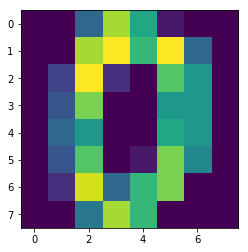

In [12]:
pylab.imshow(digits.images[0])

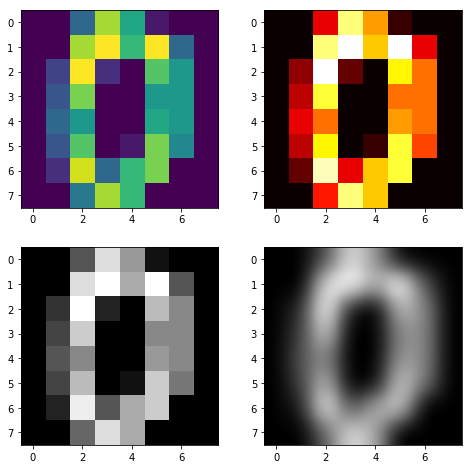

In [19]:
pyplot.figure(figsize(8, 8)) # figsize - размер изображений

pyplot.subplot(2, 2, 1) # первое изображение матрицы 2 на 2
pylab.imshow(digits.images[0])

pyplot.subplot(2, 2, 2) # второе изображение матрицы 2 на 2
pylab.imshow(digits.images[0], cmap = 'hot') # добавили горячий оттенок

pyplot.subplot(2, 2, 3) # третье изображение матрицы 2 на 2
pylab.imshow(digits.images[0], cmap = 'gray') # добавили серый оттенок

pyplot.subplot(2, 2, 4) # четвертое изображение матрицы 2 на 2
pylab.imshow(digits.images[0], cmap = 'gray', interpolation = 'quadric') # добавили сглаженный метод

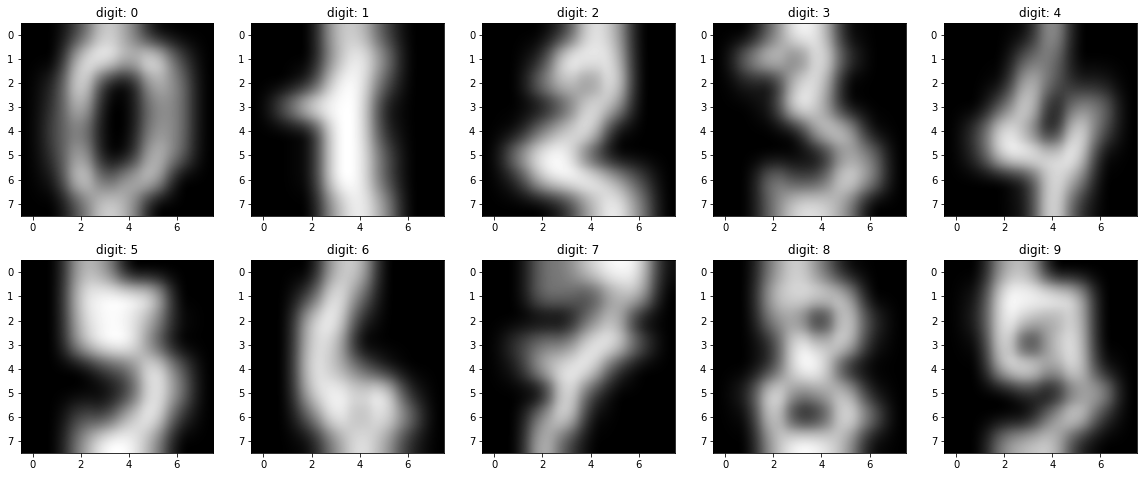

In [24]:
# постриом первые 10 объектов в выборке (орказывается это числа 0-9)
pyplot.figure(figsize(20, 8))

for plot_number, plot in enumerate(digits.images[:10]):
    pyplot.subplot(2, 5, plot_number + 1)
    pylab.imshow(plot, cmap = 'gray', interpolation = 'quadric')
    pylab.title('digit: ' + str(digits.target[plot_number]))

## Уменьшение размерности

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

from collections import  Counter

In [26]:
# для обучения выгрузим из выборки первые 1000 элементов с соответствующими им целевыми метками
data = digits.data[:1000]
labels = digits.target[:1000]

In [30]:
# выведим количество объектов по ключам labels (целевым меткам - классам)
print Counter(labels)

Counter({3: 104, 1: 102, 6: 101, 2: 100, 5: 100, 0: 99, 7: 99, 9: 99, 4: 98, 8: 98})


<Container object of 10 artists>

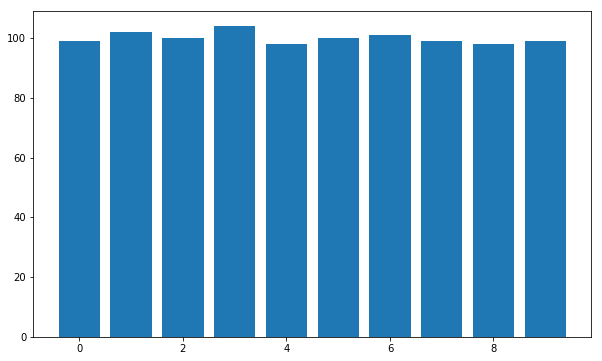

In [32]:
# построим барную гистограмму количества объектов для каждого класса
pylab.figure(figsize = (10, 6))
pylab.bar(Counter(labels).keys(), Counter(labels).values())

In [34]:
# модель K ближайших соседей
classifier = KNeighborsClassifier()

In [35]:
# обучаем модель K ближайших соседей на нашей выборке
classifier.fit(data, labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [39]:
# выведим основные метрики модели для каждого класса, посредсвтом прогнозных и истиных значений (точность, полнота, f1, support)
print classification_report(classifier.predict(data), labels)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        99
          1       1.00      0.97      0.99       105
          2       1.00      1.00      1.00       100
          3       1.00      0.98      0.99       106
          4       1.00      1.00      1.00        98
          5       0.99      1.00      0.99        99
          6       1.00      1.00      1.00       101
          7       0.99      0.99      0.99        99
          8       0.97      0.99      0.98        96
          9       0.96      0.98      0.97        97

avg / total       0.99      0.99      0.99      1000



### Признков слишком много, будем понижать размерность

### Random projection - метод случайных проекций

In [40]:
from sklearn import random_projection

In [41]:
# понизим пространство до двух признаков
projection = random_projection.SparseRandomProjection(n_components = 2, random_state = 0) # объявим метод
data_2d_rp = projection.fit_transform(data) # обучим и сразу трансформируем нашу выборку в новое пространство призников

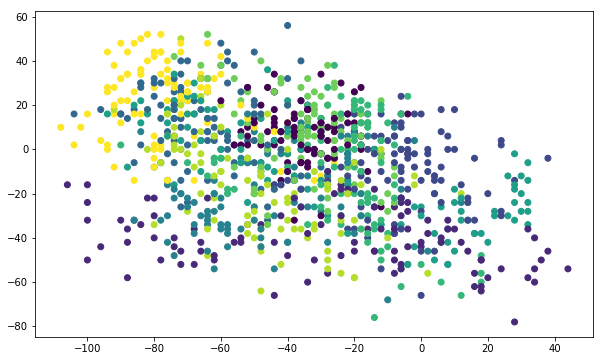

In [42]:
# визуализация объектов в новом двумерном пространстве призников data_2d_rp
pylab.figure(figsize=(10, 6))
pylab.scatter(data_2d_rp[:, 0], data_2d_rp[:, 1], c = labels) # цвета меняются по классам labels

In [43]:
# обучим модель K ближайших соседей на новой выборке
classifier.fit(data_2d_rp, labels)
print classification_report(classifier.predict(data_2d_rp), labels)

             precision    recall  f1-score   support

          0       0.74      0.47      0.58       154
          1       0.75      0.58      0.65       131
          2       0.67      0.59      0.63       113
          3       0.71      0.51      0.60       144
          4       0.38      0.56      0.45        66
          5       0.42      0.53      0.47        79
          6       0.52      0.57      0.55        93
          7       0.35      0.51      0.42        69
          8       0.37      0.58      0.45        62
          9       0.62      0.69      0.65        89

avg / total       0.60      0.55      0.56      1000



### PCA - метод главных компонент

In [48]:
from sklearn.decomposition import PCA

In [51]:
# используем метод случайных PCA для большого числа признаков: randomized
pca = PCA(n_components = 2, svd_solver='randomized', random_state = 0)
data_2d_pca = pca.fit_transform(data) # обучаем и трансформируем пространство объектов в новое дмумерное простарнство

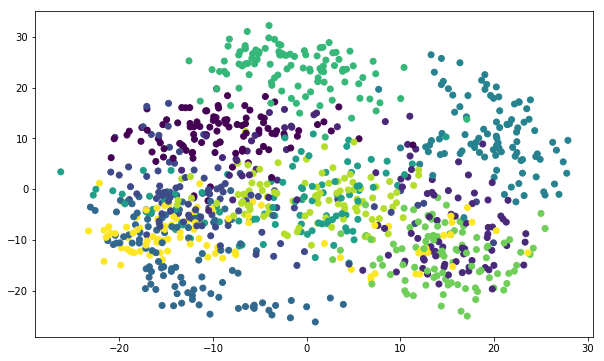

In [52]:
# визуализация объектов в новом двумерном пространстве призников data_2d_rp
pylab.figure(figsize = (10, 6))
pylab.scatter(data_2d_pca[:, 0], data_2d_pca[:, 1], c = labels)

In [53]:
# обучим модель K ближайших соседей на новой выборке
classifier.fit(data_2d_pca, labels)
print classification_report(classifier.predict(data_2d_pca), labels)

             precision    recall  f1-score   support

          0       0.83      0.73      0.77       113
          1       0.56      0.54      0.55       105
          2       0.59      0.57      0.58       104
          3       0.77      0.79      0.78       101
          4       0.95      0.93      0.94       100
          5       0.56      0.54      0.55       104
          6       0.92      0.93      0.93       100
          7       0.76      0.71      0.74       105
          8       0.62      0.66      0.64        92
          9       0.52      0.67      0.58        76

avg / total       0.71      0.71      0.71      1000



### MDS - метод многомерного шкалирования

In [54]:
from sklearn import manifold

In [56]:
# поставим ограничение на 100 итераций и будем находить пространство с двумя признаками
mds = manifold.MDS(n_components = 2, n_init = 1, max_iter = 100)
data_2d_mds = mds.fit_transform(data) # обучим и трансформируем выборку

In [57]:
# обучим модель K ближайших соседей на новой выборке
classifier.fit(data_2d_mds, labels)
print classification_report(classifier.predict(data_2d_mds), labels)

             precision    recall  f1-score   support

          0       0.97      0.89      0.93       108
          1       0.66      0.53      0.59       127
          2       0.50      0.55      0.52        91
          3       0.71      0.62      0.66       119
          4       0.68      0.54      0.60       124
          5       0.32      0.51      0.39        63
          6       0.81      0.80      0.80       103
          7       0.64      0.68      0.66        93
          8       0.70      0.71      0.71        97
          9       0.58      0.76      0.66        75

avg / total       0.68      0.66      0.66      1000



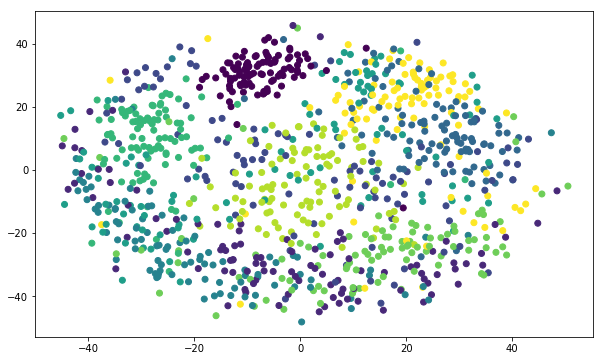

In [58]:
# визуализация объектов в новом двумерном пространстве призников data_2d_rp
pylab.figure(figsize=(10, 6))
pylab.scatter(data_2d_mds[:, 0], data_2d_mds[:, 1], c = labels)

### t- SNE - метод случайного внедрения соседей (усовершенствованный - t)

In [59]:
# будем использовать в качестве инициализации метод PCA
tsne = manifold.TSNE(n_components = 2, init = 'pca', random_state = 0)
data_2d_tsne = tsne.fit_transform(data)

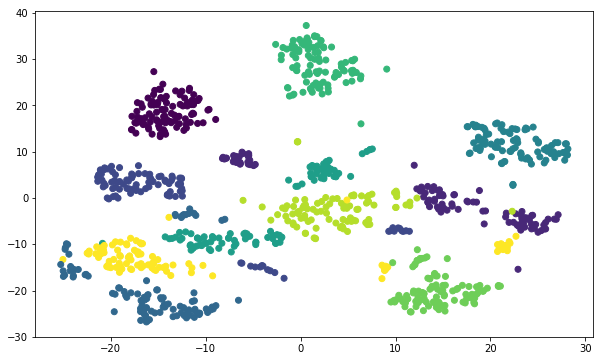

In [60]:
# визуализация объектов в новом двумерном пространстве призников data_2d_rp
pylab.figure(figsize = (10, 6))
pylab.scatter(data_2d_tsne[:, 0], data_2d_tsne[:, 1], c = labels)

In [61]:
# обучим модель K ближайших соседей на новой выборке
classifier.fit(data_2d_tsne, labels)
print classification_report(classifier.predict(data_2d_tsne), labels)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        99
          1       0.99      0.98      0.99       103
          2       1.00      1.00      1.00       100
          3       1.00      0.98      0.99       106
          4       1.00      1.00      1.00        98
          5       0.99      0.99      0.99       100
          6       0.99      1.00      1.00       100
          7       0.99      0.99      0.99        99
          8       0.98      0.99      0.98        97
          9       0.97      0.98      0.97        98

avg / total       0.99      0.99      0.99      1000

